# **IIA007 1sem2025 - Atividade Avaliativa 2**
# **Parte B**

## Disciplina: Inteligência Artificial e Aplicações
## FATEC Ferraz de Vasconcelos
### Professora: Ana Rosa C. Tonão
#### Data: 30/06/2025


-----------------------

### **Instruções importantes:**

(1) Esta atividade avaliativa deve ser realizada em **grupos de 5 integrantes (máximo)**.

(2) **Informe seu(s) nome(s) completo(s) na tabela abaixo:**




| Alunos(as) | 
| ----------- | 
| Nome: Diego Farias Macedo__________________________________________________| 
| Nome: Roger Brito Santos___________________________________________________| 
| Nome: Weigless Roberto de Souza Camargo____________________________________| 


(3) **Somente um integrante deve realizar a entrega no Teams.**

(4) O notebook final deve apresentar os códigos e suas saídas (após a execução de cada célula).

(5) Utilize os arquivos "credit_train.csv" e "credit_test.csv" gerados na parte A desta atividade, como conjuntos de treino e teste, respectivamente.


----

## **Descrição dos Dados**

O conjunto de dados original contém 1.000 entradas com 20 atributos categóricos/simbólicos.

Neste conjunto de dados, cada entrada representa uma pessoa que obtém crédito de um banco.

Cada pessoa é classificada como tendo bom ou mau risco de crédito, de acordo com o conjunto de atributos.


Os atributos selecionados são:

*   Age - numeric: in years.

*   Sex - text: male, female.

*   Job (emprego) - numeric:

        0 - unskilled and non-resident (não qualificado e não residente)
        1 - unskilled and resident (não qualificado e residente)
        2 - skilled (qualificado)  
        3 - highly skilled (altamente qualificado)

*   Housing (residência) - text:

        own (própria)
        rent (alugada)
        free (gratuita)

*   Saving accounts (montante em contas poupança) - text:

        little (pouco)
        moderate (moderado)  
        quite rich (muito alto)
        rich (alto)

*   Checking account (montante em conta-corrente) - text:

        little (pouco)
        moderate (moderado)  
        quite rich (muito alto)
        rich (alto)

*   Credit amount (valor do crédito) - numeric, in US$.

*   Duration (duração do empréstimo) - numeric, in month.

*   Purpose (objetivo do empréstimo) - text:

        car   
        furniture/equipment
        radio/TV
        domestic appliances
        repairs
        education
        business
        vacation/others


*   **Risk (risco) - value target:** Good or Bad Risk

## **Importando as bibliotecas necessárias**

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

## **Carregando os conjuntos de dados**

## *TREINO*

In [2]:
train_df = pd.read_csv('credit_train.csv')
print("Conjunto de dados de treino carregado com sucesso!")
print(f"Dimensões do DataFrame de treino: {train_df.shape}")
print("\nPrimeiras 5 linhas do conjunto de treino:")
print(train_df.head())

Conjunto de dados de treino carregado com sucesso!
Dimensões do DataFrame de treino: (700, 22)

Primeiras 5 linhas do conjunto de treino:
        Age  Credit amount  Duration  Sex_male  Job_1  Job_2  Job_3  \
0  0.200000       0.232365  0.470588       1.0    0.0    1.0    0.0   
1  0.472727       0.086882  0.161765       1.0    0.0    1.0    0.0   
2  0.127273       0.394410  0.823529       1.0    1.0    0.0    0.0   
3  0.127273       0.051447  0.117647       0.0    0.0    1.0    0.0   
4  0.127273       0.054308  0.029412       0.0    0.0    1.0    0.0   

   Housing_own  Housing_rent  Saving accounts_moderate  ...  \
0          1.0           0.0                       0.0  ...   
1          1.0           0.0                       0.0  ...   
2          1.0           0.0                       0.0  ...   
3          1.0           0.0                       0.0  ...   
4          1.0           0.0                       1.0  ...   

   Checking account_moderate  Checking account_rich  Pur

# *TESTE*

In [3]:
test_df = pd.read_csv('credit_test.csv')
print("Conjunto de dados de teste carregado com sucesso!")
print(f"Dimensões do DataFrame de teste: {test_df.shape}")
print("\nPrimeiras 5 linhas do conjunto de teste:")
print(test_df.head())

Conjunto de dados de teste carregado com sucesso!
Dimensões do DataFrame de teste: (300, 22)

Primeiras 5 linhas do conjunto de teste:
        Age  Credit amount  Duration  Sex_male  Job_1  Job_2  Job_3  \
0  0.436364       0.313250  0.294118       0.0    0.0    1.0    0.0   
1  0.454545       0.004897  0.117647       1.0    1.0    0.0    0.0   
2  0.509091       0.271817  0.338235       1.0    0.0    1.0    0.0   
3  0.109091       0.179817  0.029412       1.0    0.0    1.0    0.0   
4  0.072727       0.397381  0.117647       0.0    0.0    0.0    0.0   

   Housing_own  Housing_rent  Saving accounts_moderate  ...  \
0          1.0           0.0                       0.0  ...   
1          1.0           0.0                       0.0  ...   
2          1.0           0.0                       0.0  ...   
3          0.0           1.0                       0.0  ...   
4          0.0           1.0                       0.0  ...   

   Checking account_moderate  Checking account_rich  Purpos

## **Parte B**

### **Comparação de Modelos de Classificação**
### **Decisão de negócio: Conceder ou negar crédito**

**Objetivo:** Este notebook tem como objetivo treinar, avaliar e comparar três diferentes algoritmos de classificação para o problema de concessão de crédito para clientes de um banco.

Os modelos a serem avaliados são:
1.  Regressão Logística (nosso modelo base)
2.  Gaussian Naïve Bayes
3.  SVM (Support Vector Machine)

A comparação final será realizada com base em métricas de performance como Acurácia, Precisão, Recall, F1-Score e, principalmente, a AUC (Área Sob a Curva ROC).

--------------------


Execute todos os passos necessários e ao final, salve o notebook com as saídas:

⭕ Utilize o conjunto de dados de treino para criar e treinar os seguintes modelos de classificação:

*   Regressão Logística
*   Gaussian Naïve Bayes
*   SVM (Support Vector Machine)   


⭕ Aplique os modelos treinados ao conjunto de dados de teste para prever o risco de crédito dos clientes.


⭕ Avalie a qualidade dos seus modelos:

*   Crie a matriz de confusão
*   Gere o classification report
*   Calcule a AUC e apresente a curva ROC
*   Avalie as métricas obtidas


In [4]:
xt = train_df.drop('Risk', axis=1)
yt = train_df['Risk']

xtest = test_df.drop('Risk', axis=1)
ytest = test_df['Risk']

print("=== Dados Carregados com Sucesso ===\n")
print(f"Dimensões de X_train: {xt.shape}")
print(f"Dimensões de y_train: {yt.shape}\n")
print(f"Dimensões de X_test: {xtest.shape}")
print(f"Dimensões de y_test: {ytest.shape}")
print("\n" + "="*40 + "\n")

print("=== Amostra de X_train ===")
print(tabulate(xt.head(), headers='keys', tablefmt='psql', showindex=False))

print("\n=== Amostra de y_train ===")
print(tabulate(yt.head().to_frame(), headers='keys', tablefmt='psql', showindex=False))

=== Dados Carregados com Sucesso ===

Dimensões de X_train: (700, 21)
Dimensões de y_train: (700,)

Dimensões de X_test: (300, 21)
Dimensões de y_test: (300,)


=== Amostra de X_train ===
+----------+-----------------+------------+------------+---------+---------+---------+---------------+----------------+----------------------------+------------------------------+------------------------+-----------------------------+-------------------------+---------------+-------------------------------+---------------------+-------------------------------+--------------------+-------------------+---------------------------+
|      Age |   Credit amount |   Duration |   Sex_male |   Job_1 |   Job_2 |   Job_3 |   Housing_own |   Housing_rent |   Saving accounts_moderate |   Saving accounts_quite rich |   Saving accounts_rich |   Checking account_moderate |   Checking account_rich |   Purpose_car |   Purpose_domestic appliances |   Purpose_education |   Purpose_furniture/equipment |   Purpose_radio/T

# Treinamento e Avaliação do Modelo 1: Regressão Logística

In [5]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(xt, yt)
ypred_logreg = logreg.predict(xtest)

print("=== Avaliação do Modelo: Regressão Logística ===\n")
print("Relatório de Classificação:")
print(classification_report(ytest, ypred_logreg))

cm = confusion_matrix(ytest, ypred_logreg)
cm_labels = ['Bad Risk', 'Good Risk']

=== Avaliação do Modelo: Regressão Logística ===

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.52      0.19      0.28        90
           1       0.73      0.92      0.81       210

    accuracy                           0.70       300
   macro avg       0.62      0.56      0.54       300
weighted avg       0.66      0.70      0.65       300



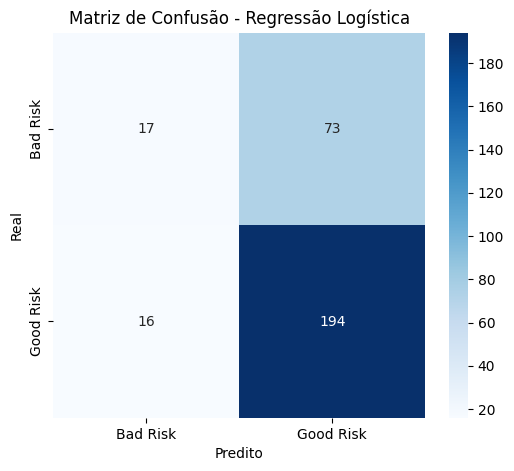

In [6]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

# Treinamento e Avaliação do Modelo 2: Árvore de Decisão

In [7]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(xt, yt)

ypred_tree = dtree.predict(xtest)

print("=== Avaliação do Modelo: Árvore de Decisão ===\n")
print("Relatório de Classificação:")
print(classification_report(ytest, ypred_tree))

cm = confusion_matrix(ytest, ypred_tree)
cm_labels = ['Bad Risk', 'Good Risk']

=== Avaliação do Modelo: Árvore de Decisão ===

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.40      0.42      0.41        90
           1       0.75      0.72      0.73       210

    accuracy                           0.63       300
   macro avg       0.57      0.57      0.57       300
weighted avg       0.64      0.63      0.64       300



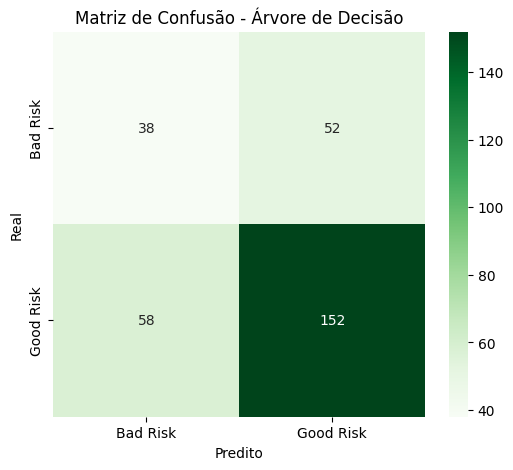

In [8]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

# Treinamento e Avaliação do Modelo 3: SVM

In [9]:
svm_model = SVC(random_state=42)
svm_model.fit(xt, yt)

ypred_svm = svm_model.predict(xtest)

print("=== Avaliação do Modelo: SVM ===\n")
print("Relatório de Classificação:")
print(classification_report(ytest, ypred_svm))

cm = confusion_matrix(ytest, ypred_svm)
cm_labels = ['Bad Risk', 'Good Risk']

=== Avaliação do Modelo: SVM ===

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.50      0.06      0.10        90
           1       0.71      0.98      0.82       210

    accuracy                           0.70       300
   macro avg       0.60      0.52      0.46       300
weighted avg       0.64      0.70      0.60       300



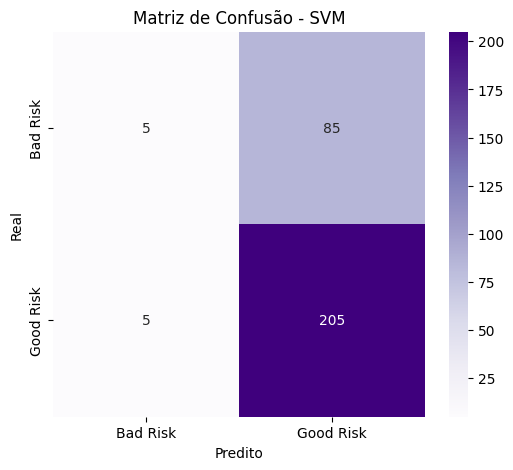

In [10]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - SVM')
plt.show()

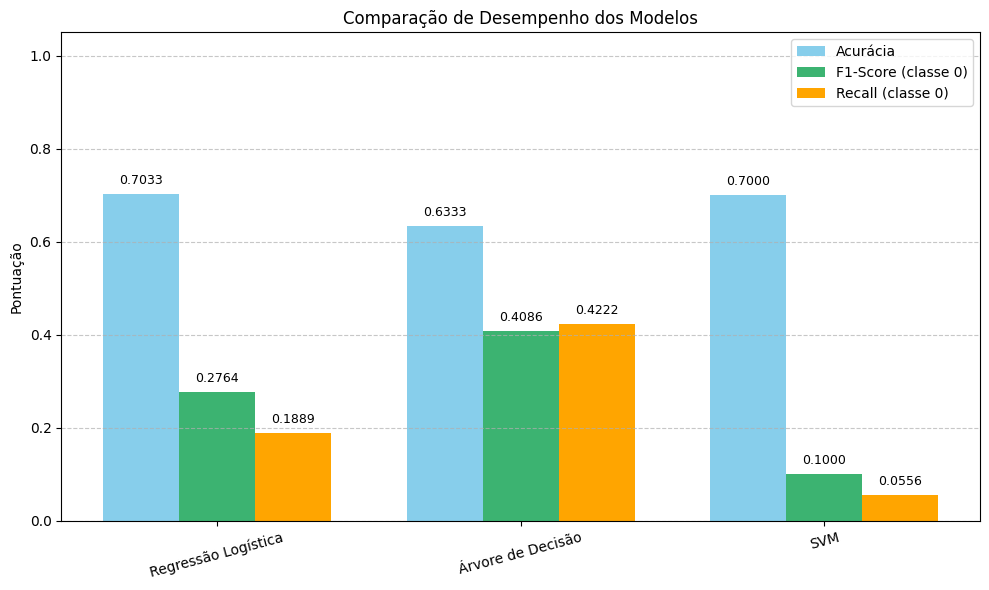

In [15]:
import numpy as np 
modelos = ['Regressão Logística', 'Árvore de Decisão', 'SVM']

acuracia = [
    accuracy_score(ytest, ypred_logreg),
    accuracy_score(ytest, ypred_tree),
    accuracy_score(ytest, ypred_svm)
]

f1score_0 = [
    f1_score(ytest, ypred_logreg, pos_label=0),
    f1_score(ytest, ypred_tree, pos_label=0),
    f1_score(ytest, ypred_svm, pos_label=0)
]

recall_0 = [
    recall_score(ytest, ypred_logreg, pos_label=0),
    recall_score(ytest, ypred_tree, pos_label=0),
    recall_score(ytest, ypred_svm, pos_label=0)
]

x = np.arange(len(modelos))
largura = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - largura, acuracia, width=largura, label='Acurácia', color='skyblue')
bars2 = ax.bar(x, f1score_0, width=largura, label='F1-Score (classe 0)', color='mediumseagreen')
bars3 = ax.bar(x + largura, recall_0, width=largura, label='Recall (classe 0)', color='orange')

def adicionar_valores(barras):
    for bar in barras:
        altura = bar.get_height()
        ax.annotate(f'{altura:.4f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, altura),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

adicionar_valores(bars1)
adicionar_valores(bars2)
adicionar_valores(bars3)

ax.set_xticks(x)
ax.set_xticklabels(modelos, rotation=15)
ax.set_ylim(0, 1.05)
ax.set_title('Comparação de Desempenho dos Modelos')
ax.set_ylabel('Pontuação')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# **CONCLUSÃO**

Análise Comparativa de Modelos para Identificação de Risco de Crédito

Considerando que estamos tentando prever clientes com alto risco de inadimplência, avaliamos três modelos: Regressão Logística, Árvore de Decisão e SVM.

* ACURÁCIA – O modelo SVM apresentou a maior acurácia geral, com 70%, enquanto a Regressão Logística atingiu 70,3% e a Árvore de Decisão, 63,3%.

* RECALL (Classe de Risco) – A Árvore de Decisão se destacou, alcançando um recall de 42,2%, ou seja, conseguiu identificar corretamente 42,2% dos clientes inadimplentes. A Regressão Logística teve recall de 18,9% e o SVM apenas 5,6%.

* F1-SCORE (Classe de Risco) – A Árvore de Decisão também foi superior, com um F1-Score de 40,9%, contra 27,6% da Regressão Logística e 10% do SVM.

**Conclusão:**
Apesar da alta acurácia do SVM, seu baixo recall compromete sua efetividade para o objetivo principal do negócio: identificar clientes de risco. Já a Árvore de Decisão, mesmo com acurácia mais baixa, apresentou desempenho muito superior nas métricas que realmente importam para redução de inadimplência. Portanto, o modelo recomendado é a Árvore de Decisão, por ser o mais alinhado com os objetivos estratégicos do banco.